In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math
import idx2numpy
import pandas as pd
import sklearn.metrics as skn

In [20]:
train_x = idx2numpy.convert_from_file('train-images.idx3-ubyte')
train_y = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
test_x = idx2numpy.convert_from_file("t10k-images.idx3-ubyte")
test_y = idx2numpy.convert_from_file("t10k-labels.idx1-ubyte")

## Flatening the Arrays

In [21]:
X = np.array([i.flatten() for i in train_x])
test = np.array([i.flatten() for i in test_x])

In [26]:
X[:100].shape

(100, 784)

In [27]:
dist_matrix = skn.pairwise_distances(X[:100],X[:100],metric = "euclidean")

In [32]:
def mds():
  D = np.loadtxt('distances.txt', delimiter=',')
  print(D)
  C = np.genfromtxt('cities.txt', dtype = 'str', delimiter="\n")
  n = len(D)
  H = np.eye(n) - np.ones((n,n))/n
  
  B = -0.5 * H.dot(D**2).dot(H)
  
  evals, evecs = np.linalg.eigh(B)
  idx = np.argsort(evals)[::-1]
  evals = evals[idx]
  evecs = evecs[:,idx] # col i represents eigenvector i

  #w, = np.where(evals > 0)
  w = [0,1]
  L = np.diag(np.sqrt(evals[w]))
  U = evecs[:,w]
  Y = U.dot(L)
  return Y, C

[[   0.  936.  587. 1210.  701.  606.  746. 1887. 2135. 2178.]
 [ 936.    0.  850. 1765. 1603. 1258.  190. 2578. 2693. 2485.]
 [ 587.  850.    0.  917.  939. 1189.  712. 1730. 1854. 1733.]
 [1210. 1765.  917.    0.  878. 1724. 1627.  833.  948. 1020.]
 [ 701. 1603.  939.  878.    0.  967. 1417. 1301. 1642. 1889.]
 [ 606. 1258. 1189. 1724.  967.    0. 1092. 2267. 2590. 2731.]
 [ 746.  190.  712. 1627. 1417. 1092.    0. 2427. 2566. 2402.]
 [1887. 2578. 1730.  833. 1301. 2267. 2427.    0.  458. 1064.]
 [2135. 2693. 1854.  948. 1642. 2590. 2566.  458.    0.  679.]
 [2178. 2485. 1733. 1020. 1889. 2731. 2402. 1064.  679.    0.]]
[[ -680.22534794   216.28672377]
 [-1173.44903431  -581.59822413]
 [ -377.78373289  -287.88391949]
 [  503.20700218   -34.37222909]
 [  -95.06977925   606.40590091]
 [-1063.73664248   683.12599782]
 [-1077.65384581  -416.64033258]
 [ 1197.97177839   429.78109748]
 [ 1447.9689219     37.35444593]
 [ 1318.7706802   -652.45946061]]


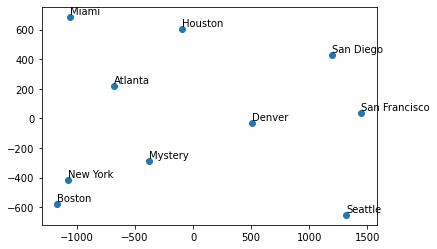

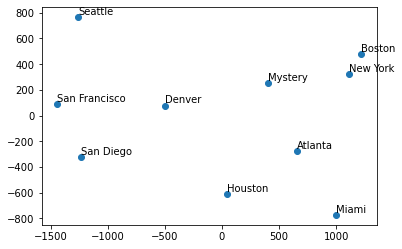

In [33]:
def plot(Y, C, d):
  print(Y)
  fig = plt.figure(0)
  ax = fig.add_subplot(111)
  ax.scatter(Y[:,0], Y[:,1])
  for i in range(len(C)):
    ax.annotate(C[i], (Y[i][0], Y[i][1]+20), fontsize = 10)
  #plt.savefig('hw7-4.pdf')
  fig1 = plt.figure(1)
  theta = d / 180.0 * math.pi
  R = np.array([[math.cos(theta), -math.sin(theta)],[math.sin(theta), math.cos(theta)]])
  Y_t = R.dot(Y.T).T
  ax1 = fig1.add_subplot(111)
  ax1.scatter(Y_t[:,0], Y_t[:,1])
  for i in range(len(C)):
    ax1.annotate(C[i], (Y_t[i][0], Y_t[i][1]+20), fontsize = 10)
  #plt.savefig('hw7-4_turn.pdf')

def main():
  Y, C = mds()
  plot(Y, C, 175)

if __name__ == '__main__':
  main()

In [35]:
def mds():
  D = dist_matrix
  C = ["0","1","2","3","4","5","6","7","8","9"]
  n = len(D)
  H = np.eye(n) - np.ones((n,n))/n
  
  B = -0.5 * H.dot(D**2).dot(H)
  
  evals, evecs = np.linalg.eigh(B)
  idx = np.argsort(evals)[::-1]
  evals = evals[idx]
  evecs = evecs[:,idx] # col i represents eigenvector i

  #w, = np.where(evals > 0)
  w = [0,1]
  L = np.diag(np.sqrt(evals[w]))
  U = evecs[:,w]
  Y = U.dot(L)
  return Y, C

[[ -317.5100841    406.93277095]
 [-1101.23738935  -436.79683389]
 [  229.30540046   -88.96009153]
 [  814.09226221   318.06522476]
 [  429.77615278  -494.28681559]
 [  -99.93753972  -506.0879992 ]
 [  599.93024523   467.99401361]
 [ -789.75560098   464.850612  ]
 [  773.26782693   292.68880774]
 [  471.93508997  -706.51845935]
 [ -266.23239891   798.5403072 ]
 [  772.97461623    37.60962201]
 [ -532.42867824  1335.52295705]
 [ -100.99405162  -910.18814818]
 [  781.63872615   336.96036745]
 [  348.15731594  -850.79614828]
 [  -58.18393966    42.41660465]
 [  266.5017763   -225.13512515]
 [  163.38241426   -34.02697646]
 [  720.13814071  -222.06822984]
 [  -75.69344054  -212.28727478]
 [-1053.12418691  -242.63486835]
 [  651.30114206  -438.25655974]
 [  834.2011137    277.42339317]
 [  229.84520098   -74.12706736]
 [ -919.18888884   681.54576462]
 [  668.24144565    74.94796199]
 [-1141.26283079  1041.0389502 ]
 [ -502.30391578   370.69674041]
 [  733.38071776  -356.28402446]
 [  304.93

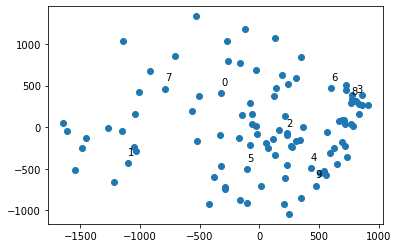

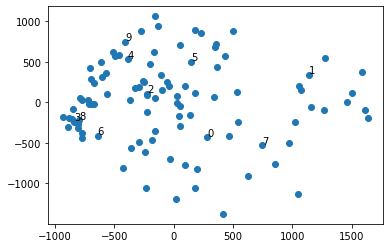

In [37]:
def plot(Y, C, d):
  print(Y)
  fig = plt.figure(0)
  ax = fig.add_subplot(111)
  ax.scatter(Y[:,0], Y[:,1])
  for i in range(len(C)):
    ax.annotate(C[i], (Y[i][0], Y[i][1]+20), fontsize = 10)
  #plt.savefig('hw7-4.pdf')
  fig1 = plt.figure(1)
  theta = d / 180.0 * math.pi
  R = np.array([[math.cos(theta), -math.sin(theta)],[math.sin(theta), math.cos(theta)]])
  Y_t = R.dot(Y.T).T
  ax1 = fig1.add_subplot(111)
  ax1.scatter(Y_t[:,0], Y_t[:,1])
  for i in range(len(C)):
    ax1.annotate(C[i], (Y_t[i][0], Y_t[i][1]+20), fontsize = 10)
  #plt.savefig('hw7-4_turn.pdf')

def main():
  Y, C = mds()
  plot(Y, C, 175)

if __name__ == '__main__':
  main()